# <div align="center">Sales Data Analysis</div>
### <div align="center">Author: <a href="https://www.linkedin.com/in/kamingyip/">Kaming Yip</a>&emsp;&emsp;GitHub: <a href = "https://github.com/KamingYip">https://github.com/KamingYip</a>&emsp;&emsp;Date: Feb. 11, 2021</div>

### Interpreting the Dataset
In these exercises, you will work with sales data from a marketplace with several stores.  The attached CSV file lists the customer, date, and dollar value of orders placed in 2017. Assume that there is only one product in each order. The store ID and product ID are also included for each ordered product. The gender of each customer is also provided. Please do not exclude $0 orders.

### Exercise 1
Assemble a dataframe with one row per customer and the following columns:
* customer_id 
* gender
* most_recent_order_date 
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

#### Answer 1
First, we import the packages that would be used in this exercise and read in the sales data into DataFrame from the provided .csv file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_data = pd.read_csv("./screening_exercise_orders_v202101.csv")
sales_data.head()

,customer_id,gender,date,product_value,store_id,product_id,product_is_red
0,1000,0,2017-01-01 00:11:31,72.346503,5,516,True
1,1001,0,2017-01-01 00:29:56,326.006005,2,287,False
2,1002,1,2017-01-01 01:30:31,420.453635,4,450,False
3,1003,1,2017-01-01 01:34:22,377.703064,0,81,True
4,1004,0,2017-01-01 03:11:54,35.620216,7,743,False


For convenience sake, the `customer_id` and `gender` column will be defined as category and the `date` column will be converted to datetime format.

In [3]:
sales_data["customer_id"] = sales_data["customer_id"].astype("category")
sales_data["gender"] = sales_data["gender"].astype("category")
sales_data["date"] = pd.to_datetime(sales_data["date"], format = "%Y-%m-%d %H:%M:%S")

Create a pivot table to summarize the desired statistics.

In [4]:
pivot_data = sales_data.pivot_table(index = ["customer_id", "gender"], values = ["date"], aggfunc = [np.max, len])
pivot_data.head()

,,amax,len
,,date,date
customer_id,gender,,
1000,0,2017-01-01 00:11:31,1.0
1001,0,2017-01-01 00:29:56,1.0
1002,1,2017-02-19 21:35:31,3.0
1003,1,2017-04-26 02:37:20,4.0
1004,0,2017-01-01 03:11:54,1.0


Convert the pivot table to a pandas DataFrame and the `order_count` column to integer format.

In [5]:
pivot_df = pivot_data.reset_index().sort_values(by = "customer_id", ascending = True)
pivot_df.columns = ["customer_id", "gender", "most_recent_order_date", "order_count"]
pivot_df["order_count"] = pivot_df["order_count"].astype(int)
pivot_df.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### Exercise 2
Plot the total order count for the marketplace by week. Do not use plotly, as plotly graphs in Jupyter Notebooks don't render correctly on different machines.

#### Answer 2
Since the question didn't specify the first day of the week, I will create the visulization in two versions (i.e. Sunday/Monday as the first day of the week). 

In [6]:
import matplotlib.pyplot as plt

In [7]:
weekly_data = sales_data.copy()
weekly_data["Week_Number_M"] = weekly_data["date"].dt.strftime("%Y-%W")
weekly_data["Week_Number_S"] = weekly_data["date"].dt.strftime("%Y-%U")
weekly_data.head()

,customer_id,gender,date,product_value,store_id,product_id,product_is_red,Week_Number_M,Week_Number_S
0,1000,0,2017-01-01 00:11:31,72.346503,5,516,True,2017-00,2017-01
1,1001,0,2017-01-01 00:29:56,326.006005,2,287,False,2017-00,2017-01
2,1002,1,2017-01-01 01:30:31,420.453635,4,450,False,2017-00,2017-01
3,1003,1,2017-01-01 01:34:22,377.703064,0,81,True,2017-00,2017-01
4,1004,0,2017-01-01 03:11:54,35.620216,7,743,False,2017-00,2017-01


It should be noted that, since January 1, 2017 was the first Sunday of the year, all days preceding the first Monday (i.e. January 2, 2017) are considered to be in week 0 if Monday is considered as the first day of the week. And this explains the difference between the week number calculations as shown.

##### 2.i. Monday as the first day of the week

In [8]:
weekly_count_M = weekly_data.groupby("Week_Number_M").size().to_frame(name = "order_count_per_week").reset_index()
weekly_count_M.head()

,Week_Number_M,order_count_per_week
0,2017-00,14
1,2017-01,180
2,2017-02,264
3,2017-03,405
4,2017-04,233


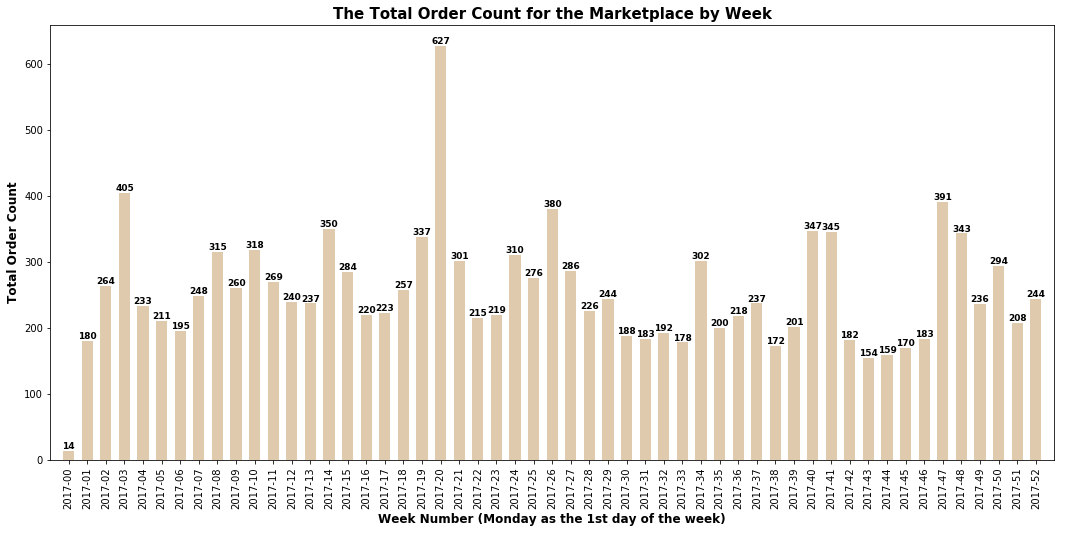

In [9]:
plt.figure(figsize=(18, 8))
f1 = plt.bar(weekly_count_M["Week_Number_M"], weekly_count_M["order_count_per_week"],
             align = "center", alpha = 0.7, color = "tan", width = 0.6)
plt.title("The Total Order Count for the Marketplace by Week", fontsize = 15, fontweight='bold')
plt.xlabel("Week Number (Monday as the 1st day of the week)", fontsize = 12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Order Count", fontsize = 12, fontweight='bold')
plt.axis('tight')
for i in f1:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2.0, height, height.astype(int), ha = "center", va = "bottom",
             fontsize = 9, fontweight='bold')
plt.xlim(-1,len(weekly_count_M))
plt.show()

##### 2.ii. Sunday as the first day of the week

In [10]:
weekly_count_S = weekly_data.groupby("Week_Number_S").size().to_frame(name = "order_count_per_week").reset_index()
weekly_count_S.head()

,Week_Number_S,order_count_per_week
0,2017-01,175
1,2017-02,259
2,2017-03,356
3,2017-04,287
4,2017-05,209


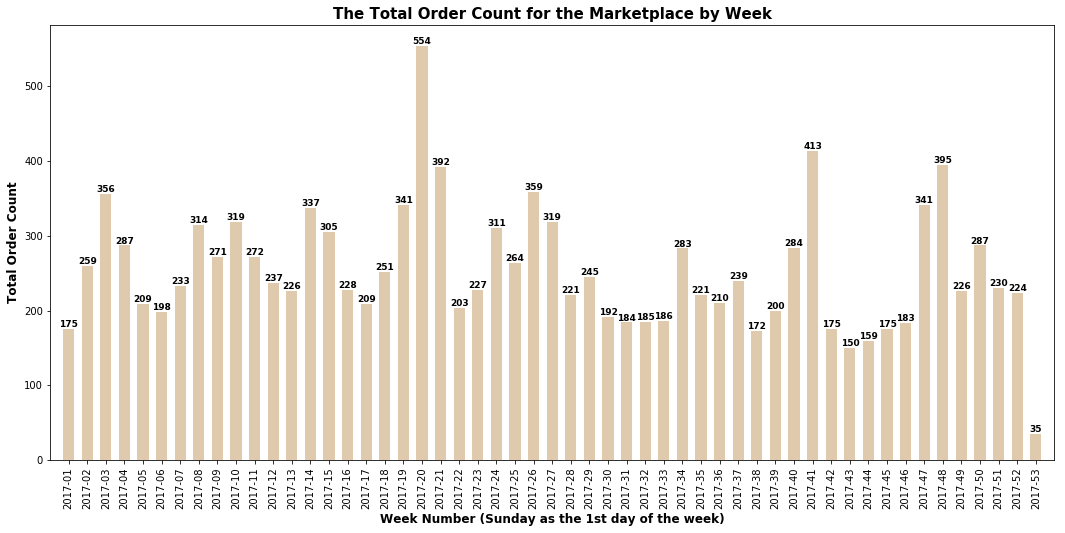

In [11]:
plt.figure(figsize=(18, 8))
f2 = plt.bar(weekly_count_S["Week_Number_S"], weekly_count_S["order_count_per_week"],
             align = "center", alpha = 0.7, color = "tan", width = 0.6)
plt.title("The Total Order Count for the Marketplace by Week", fontsize = 15, fontweight='bold')
plt.xlabel("Week Number (Sunday as the 1st day of the week)", fontsize = 12, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Total Order Count", fontsize = 12, fontweight='bold')
plt.axis('tight')
for i in f2:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2.0, height, height.astype(int), ha = "center", va = "bottom",
             fontsize = 9, fontweight='bold')
plt.xlim(-1,len(weekly_count_S))
plt.show()

### Exercise 3

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? 

**Justify your choice of method and state any assumptions you make**.

#### Answer 3
Before deciding which method to test the difference between the mean order value for both genders, I would like to check the distribution of them.

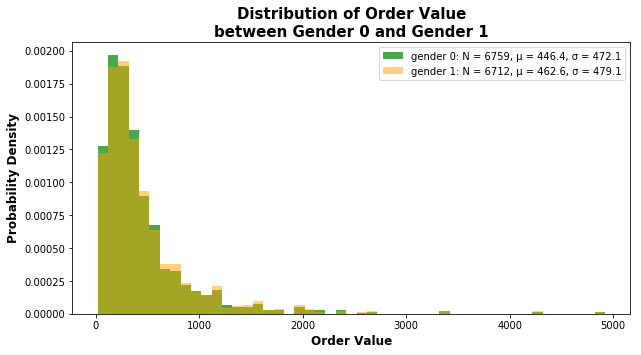

In [12]:
f3 = plt.figure(figsize = (10, 5))
ax3 = f3.add_subplot(111)

plt.hist(sales_data.loc[sales_data["gender"] == 0, "product_value"],
         label = "gender 0: N = {0}, μ = {1:.1f}, σ = {2:.1f}".\
                     format(len(sales_data[sales_data["gender"] == 0]),
                                sales_data.loc[sales_data["gender"] == 0, "product_value"].mean(),
                                sales_data.loc[sales_data["gender"] == 0, "product_value"].std()),
         density = True, alpha = 0.7, color = "green",
         bins = np.arange(min(sales_data["product_value"]), max(sales_data["product_value"])+100, 100))
plt.hist(sales_data.loc[sales_data["gender"] == 1, "product_value"],
         label = "gender 1: N = {0}, μ = {1:.1f}, σ = {2:.1f}".\
                     format(len(sales_data[sales_data["gender"] == 1]),
                            sales_data.loc[sales_data["gender"] == 1, "product_value"].mean(),
                            sales_data.loc[sales_data["gender"] == 1, "product_value"].std()),
         density = True, alpha = 0.5, color = "orange",
         bins = np.arange(min(sales_data["product_value"]), max(sales_data["product_value"])+100, 100))

plt.title("Distribution of Order Value\nbetween Gender 0 and Gender 1", fontsize = 15, fontweight='bold')
plt.xlabel("Order Value", fontsize = 12, fontweight='bold')
plt.ylabel("Probability Density", fontsize = 12, fontweight='bold')
plt.legend()
plt.show()

As displayed, neither of the two distributions is normally distributed (i.e. bell-shaped distribution curve), which is one of the assumptions to conduct <i>t</i>-test. Instead, the distributions are positively skewed. Also, it should be noted that the two datasets have unequal variances as well as unequal sample sizes. In this instance, <b>Welch's <i>t</i>-test</b> can be a reliable adaptation of Student's <i>t</i>-test to test the hypothesis that the order value for gender 0 and for gender 1 have equal means.

However, since the assumption of sampel distribution normality is maintained in Welch's <i>t</i>-test, I will convert the `product_value` column into a normal distribution using log transformation.

In [13]:
from tabulate import tabulate

   * Skewness Coefficient Changes *

   Gender    Original    Converted
--------  ----------  -----------
       0      3.8541       0.0576
       1      3.5277       0.0771


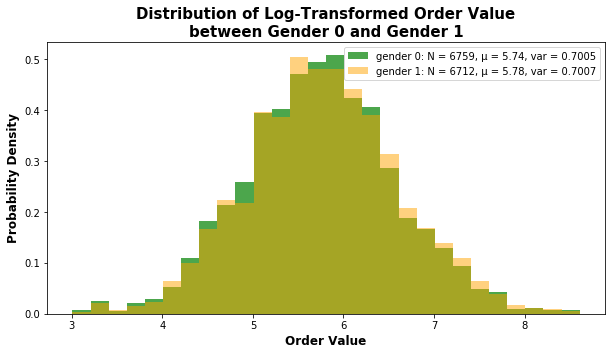

In [14]:
gender_data = sales_data.copy()
gender_data["log_product_value"] = np.log(gender_data["product_value"])
skewness_values = {"Gender": [0, 1],
                   "Original": [gender_data.loc[sales_data["gender"] == 0, "product_value"].skew(),
                                gender_data.loc[sales_data["gender"] == 1, "product_value"].skew()],
                   "Converted": [gender_data.loc[sales_data["gender"] == 0, "log_product_value"].skew(),
                                 gender_data.loc[sales_data["gender"] == 1, "log_product_value"].skew()]}
gender_skew = pd.DataFrame(skewness_values)
print(" "*3 + "* Skewness Coefficient Changes *\n\n",
      tabulate(gender_skew.round(4), headers = "keys", numalign = "right", showindex = False))

f4 = plt.figure(figsize = (10, 5))
ax4 = f4.add_subplot(111)

plt.hist(gender_data.loc[gender_data["gender"] == 0, "log_product_value"],
         label = "gender 0: N = {0}, μ = {1:.2f}, var = {2:.4f}".\
                     format(len(gender_data[gender_data["gender"] == 0]),
                                gender_data.loc[gender_data["gender"] == 0, "log_product_value"].mean(),
                                gender_data.loc[gender_data["gender"] == 0, "log_product_value"].var()),
         density = True, alpha = 0.7, color = "green",
         bins = np.arange(min(gender_data["log_product_value"]), max(gender_data["log_product_value"])+0.2, 0.2))
plt.hist(gender_data.loc[gender_data["gender"] == 1, "log_product_value"],
         label = "gender 1: N = {0}, μ = {1:.2f}, var = {2:.4f}".\
                     format(len(gender_data[gender_data["gender"] == 1]),
                            gender_data.loc[gender_data["gender"] == 1, "log_product_value"].mean(),
                            gender_data.loc[gender_data["gender"] == 1, "log_product_value"].var()),
         density = True, alpha = 0.5, color = "orange",
         bins = np.arange(min(gender_data["log_product_value"]), max(gender_data["log_product_value"])+0.2, 0.2))

plt.title("Distribution of Log-Transformed Order Value\nbetween Gender 0 and Gender 1",
          fontsize = 15, fontweight='bold')
plt.xlabel("Order Value", fontsize = 12, fontweight='bold')
plt.ylabel("Probability Density", fontsize = 12, fontweight='bold')
plt.legend()
plt.show()

As expected, after log transformation, the skew coefficient has gone from 3.85 to 0.06 for the log-transformed order value for gender 0 and from 3.53 to 0.08 for gender 1. Also, from the updated visulization, the distributions can now be regarded as symmetrical, with most values falling towards the center and long tails symmetrically to the left and right. The data meets the assumptions to conduct a Welch's <i>t</i>-test and is good to go.

The hypothesis being tested in this case will be:
- Null hypothesis (H<sub>0</sub>): the mean order value for gender 0 and for gender 1 are <b>equal</b>.
- Alternative hypothesis (H<sub>A</sub>): the mean order value for gender 0 and for gender 1 are <b>NOT equal</b>.

If the p-value of the test is less than or equal to the significance level of the test (<i>α</i>), let's set 0.05 in this case, that suggests that the data is sufficiently inconsistent with the null hypothesis (H<sub>0</sub>) and that the null hypothesis (H<sub>0</sub>) may be rejected. In other words, in such circumstance, the hypothesis test suggests that a significant difference does exist betweent the mean order value for gender 0 and for gender 1 and the two mean values are not equal. Otherwise, if the p-value is larger than the significance level (<i>α</i>), it suggests that the strength of the evidence falls short of being able to reject the null hypothesis (H<sub>0</sub>) and, consequently, we fail to reject it. However, a hypothesis test does not determine which hypothesis is true: it only assesses whether evidence exists to reject the null hypothesis (H<sub>0</sub>).

In [15]:
from scipy import stats

In [16]:
alpha = 0.05
p_value = stats.ttest_ind(gender_data.loc[gender_data["gender"] == 0, "log_product_value"],
                          gender_data.loc[gender_data["gender"] == 1, "log_product_value"],
                          equal_var = False).pvalue
print("The p-value of the hypothesis test is {0:.4f} and is {1} than the significance level (α = {2}).".\
      format(p_value, "less" if p_value <= alpha else "larger", alpha))

The p-value of the hypothesis test is 0.0121 and is less than the significance level (α = 0.05).


As shown in the results, the p-value is significant, therefore we can <b>reject</b> the null hypothesis (H<sub>0</sub>) that the mean order value for gender 0 and for gender 1 are equal in support of the alternative.

### Exercise 4

Suppose that some of our customers told us that they believe red products are more eye-catching and therefore easier to sell. Based on the dataset provided, would you suggest that companies should color more of their products red? Why or why not and what other factors could be important to determine this? 

**Please justify your answer and state any assumptions you make.**

#### Answer 4
Similarly, I would like to visualize the distribution of order value between red and non-red products.

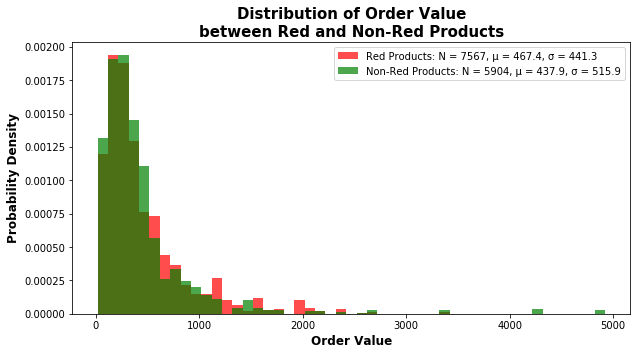

In [17]:
f5 = plt.figure(figsize = (10, 5))
ax5 = f5.add_subplot(111)

plt.hist(sales_data.loc[sales_data["product_is_red"] == True, "product_value"],
         label = "Red Products: N = {0}, μ = {1:.1f}, σ = {2:.1f}".\
                     format(len(sales_data[sales_data["product_is_red"] == True]),
                                sales_data.loc[sales_data["product_is_red"] == True, "product_value"].mean(),
                                sales_data.loc[sales_data["product_is_red"] == True, "product_value"].std()),
         density = True, alpha = 0.7, color = "red",
         bins = np.arange(min(sales_data["product_value"]), max(sales_data["product_value"])+100, 100))
plt.hist(sales_data.loc[sales_data["product_is_red"] == False, "product_value"],
         label = "Non-Red Products: N = {0}, μ = {1:.1f}, σ = {2:.1f}".\
                     format(len(sales_data[sales_data["product_is_red"] == False]),
                            sales_data.loc[sales_data["product_is_red"] == False, "product_value"].mean(),
                            sales_data.loc[sales_data["product_is_red"] == False, "product_value"].std()),
         density = True, alpha = 0.7, color = "green",
         bins = np.arange(min(sales_data["product_value"]), max(sales_data["product_value"])+100, 100))

plt.title("Distribution of Order Value\nbetween Red and Non-Red Products", fontsize = 15, fontweight='bold')
plt.xlabel("Order Value", fontsize = 12, fontweight='bold')
plt.ylabel("Probability Density", fontsize = 12, fontweight='bold')
plt.legend()
plt.show()

Apparently, there are more red products sold (7,567 vs 5,904) in the given dataset and the mean value for the red products, as \$467.4, is higher than the mean value for non-red products.

In regards to store and product metrics, I have some interesting findings. The dataset has 900 different product IDs, which I assume there are 900 individual products, and 9 store IDs, which is also regarded as 9 different stores. Each store has 100 different products to sell and each product is only sold in one unique store.

In [18]:
print("Different Product IDs #: {0}".format(sales_data["product_id"].nunique()),
      "Different Stores IDs #: {0}".format(sales_data["store_id"].nunique()), sep = "\n", end = "\n\n")

Different Product IDs #: 900
Different Stores IDs #: 9



In [19]:
store_data = sales_data.groupby(["store_id"])["product_id"].nunique().\
             to_frame(name = "Total Product").reset_index()

store_data["Red Product"] = sales_data[sales_data["product_is_red"] == True].\
                              groupby(["store_id"])["product_id"].nunique()
store_data["Non-Red Product"] = sales_data[sales_data["product_is_red"] == False].\
                                  groupby(["store_id"])["product_id"].nunique()
store_data = store_data.fillna(0).astype(int)
print(" "*15 + "* Unique Products in Each Store *\n", store_data.to_string(index = False))

               * Unique Products in Each Store *
  store_id  Total Product  Red Product  Non-Red Product
        0            100          100                0
        1            100           78               22
        2            100            0              100
        3            100            0              100
        4            100           52               48
        5            100           56               44
        6            100            4               96
        7            100           93                7
        8            100           73               27


As shown in the table, there are some stores that only sell single category of products (i.e. red or non-red). For example, store 0 only sells red products, while store 2 and store 3 only have non-red products in store. If we count the products sold in each store and separate them by the color of the products, we can generate a bar plot as follows.

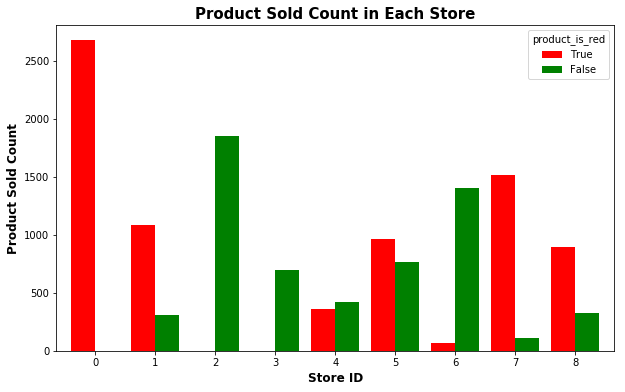

In [20]:
store_color = sales_data.groupby(["store_id", "product_is_red"]).size().\
              unstack(fill_value = 0).reindex(columns = [True, False])

ax6 = store_color.plot(kind = "bar", color = ["red", "green"], width = 0.8, figsize = (10, 6))
ax6.set_title("Product Sold Count in Each Store", fontsize = 15, fontweight='bold')
ax6.set_xlabel("Store ID", fontsize = 12, fontweight='bold')
ax6.set_xticklabels(labels = store_color.index, rotation = 0)
ax6.set_ylabel("Product Sold Count", fontsize = 12, fontweight='bold')

plt.show()

The bar plot indicates that, in those stores that provide both categories of products, customers didn't specifically incline to either category. The similar situation also occurs when we separate the sales data by genders.

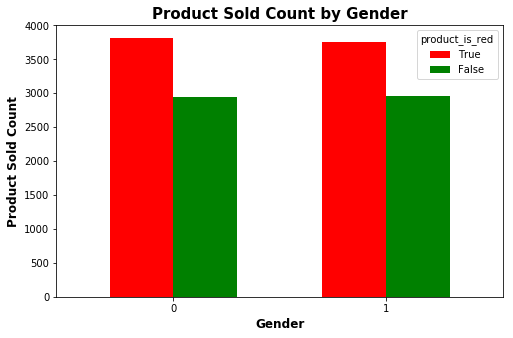

In [21]:
gender_color = sales_data.groupby(["gender", "product_is_red"]).size().\
               unstack(fill_value = 0).reindex(columns = [True, False])

ax7 = gender_color.plot(kind = "bar", color = ["red", "green"], width = 0.6, figsize = (8, 5))
ax7.set_title("Product Sold Count by Gender", fontsize = 15, fontweight='bold')
ax7.set_xlabel("Gender", fontsize = 12, fontweight='bold')
ax7.set_xticklabels(labels = gender_color.index, rotation = 0)
ax7.set_ylabel("Product Sold Count", fontsize = 12, fontweight='bold')

plt.show()

There is no clear pattern that suggests that which gender would prefer products in one color category to the others.

So far, we have analyzed the information in the provided dataset. Unfortunately, we fail to draw a solid conclusion whether customers would prefer the red products to the non-red products. There is no strong evidence that supports the conclusion and, therefore, I cannot suggest the companies to color more of their products red only based on the  provided dataset.

Specially, the dataset provides limited information on the types and functions of products, which could be one of the major factors that could be significantly determinant when purchased. Let's assume a customer looking for Pepsi, which is typically in blue packaging. However, the store doesn't have Pepsi right now; alternatively, they have Coke which is, instead, in red packaging. The customer may or may not choose Coke instead, totally depending on individual preference. That being said, it is only proper to analyse customer preference for the product color among substitute projects that serve the same purpose as the other products sold in the store.

Also, there is no information about in which circumstances the products were sold. Typical marketing strategies includes BOGO, lifestyle discounts, bundle sale, coupons, etc. These promotions could largely affect the decisions made by the price buyers, who care mainly about the price and are less likely to stick on specific types of products, no matter what the product color is. Without such information, although we observe that red products were sold more than the non-red products, we could be too arbitary to make any reliable suggestions.